<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

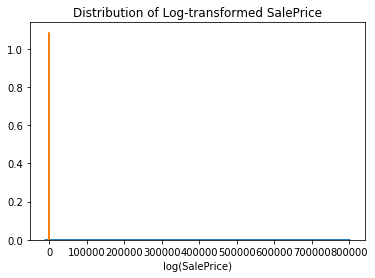

36


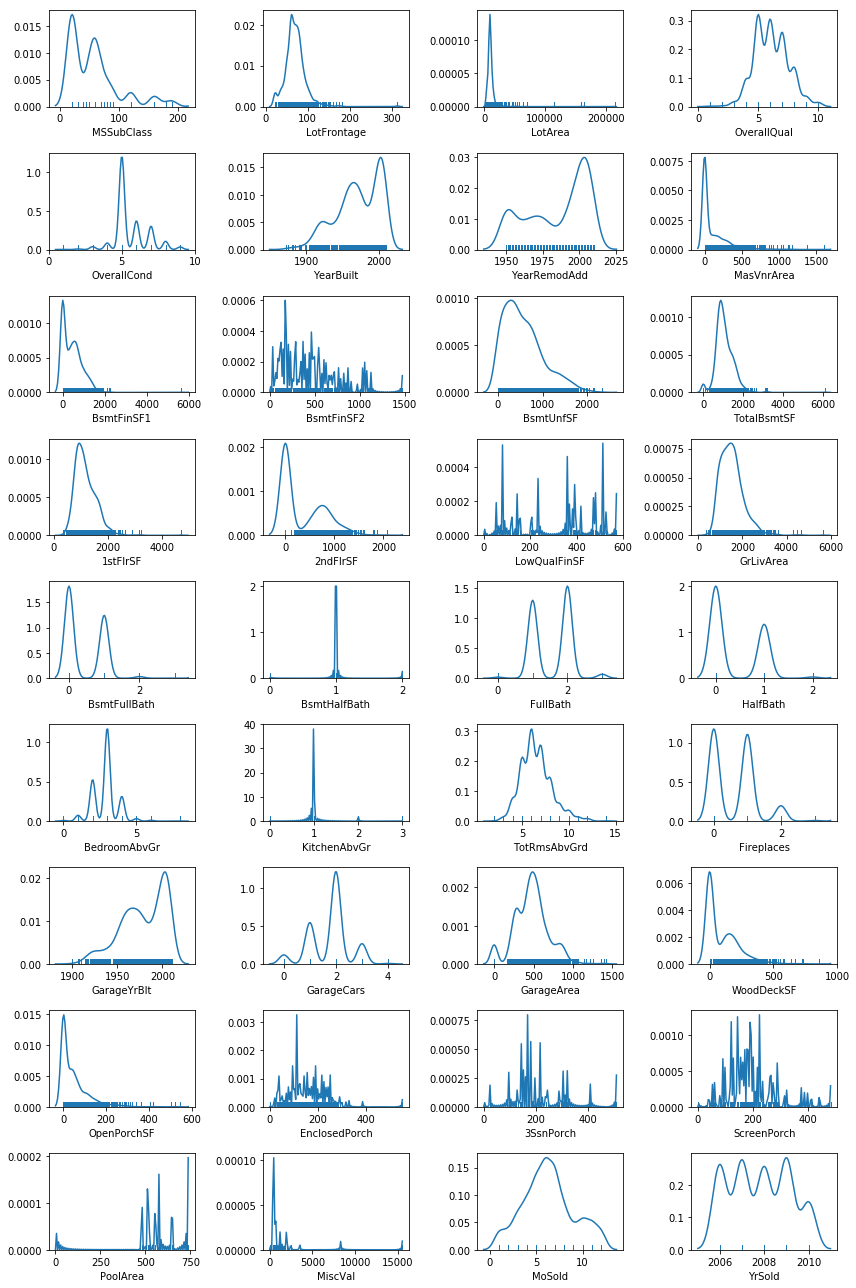

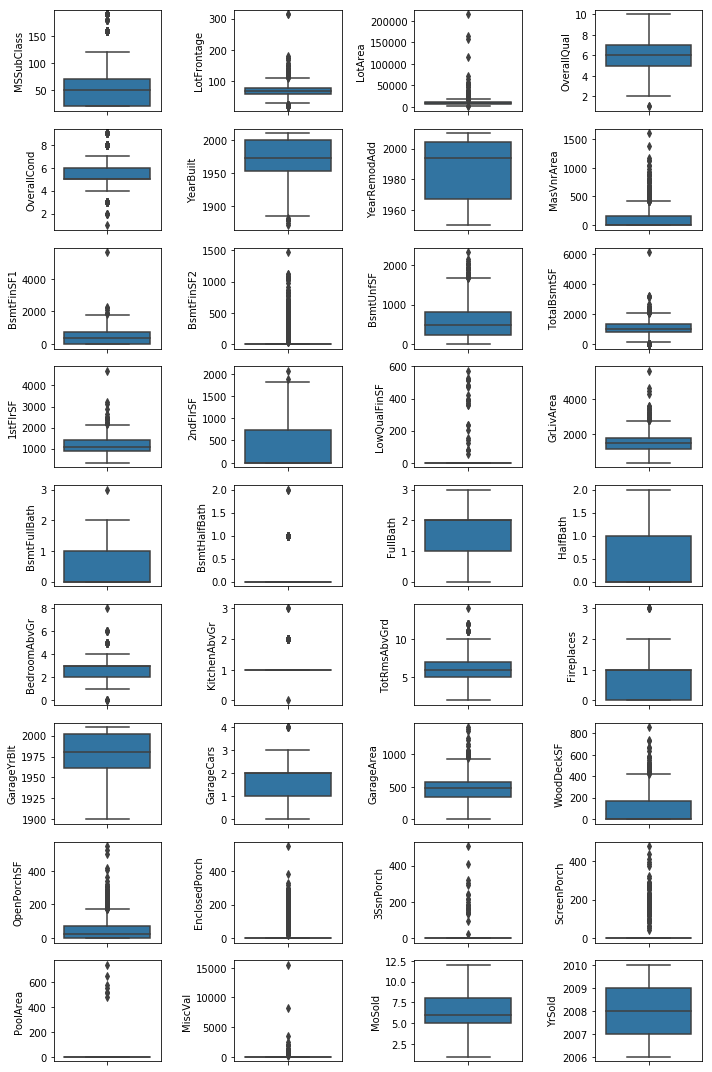

/Users/y0y01fb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:154: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


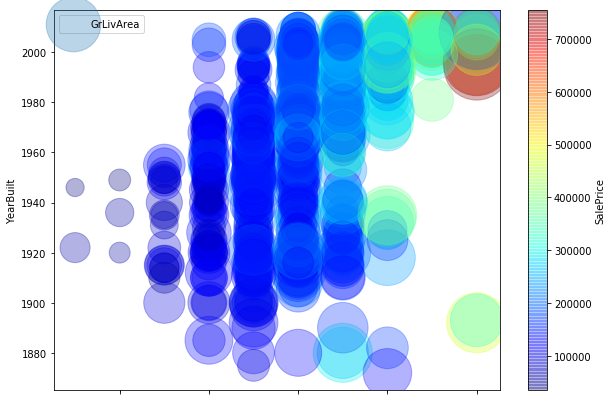

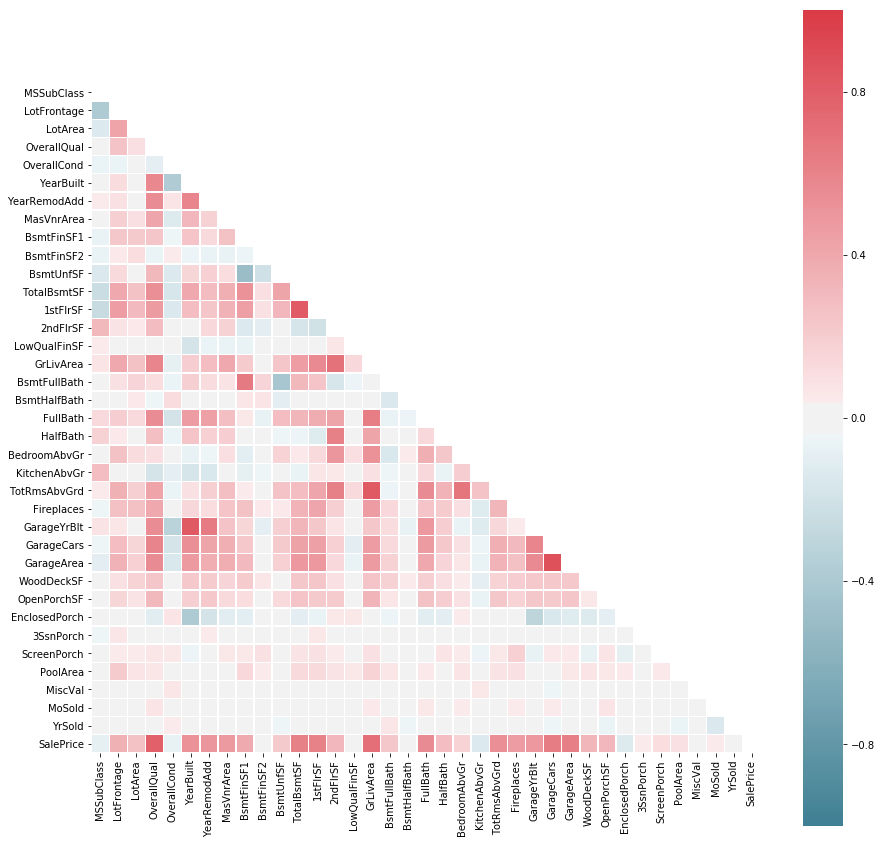

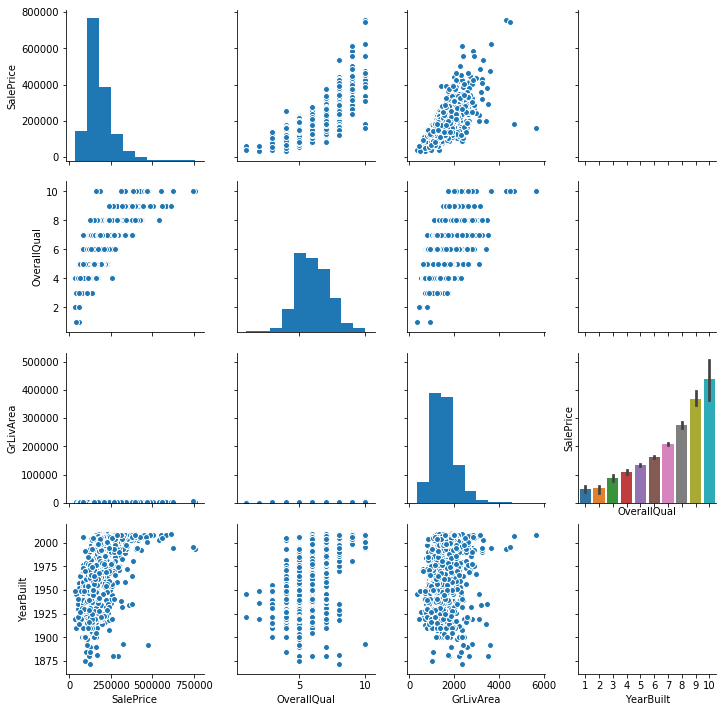

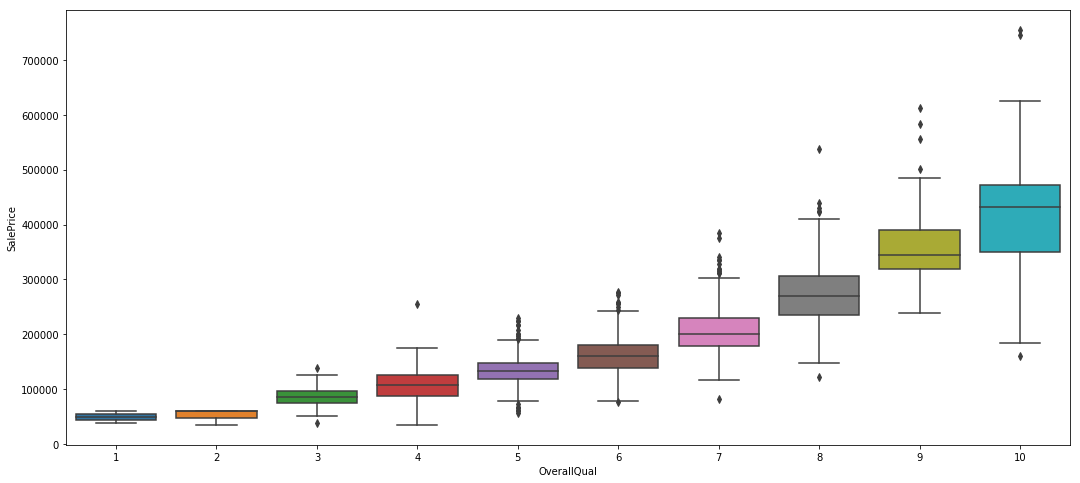

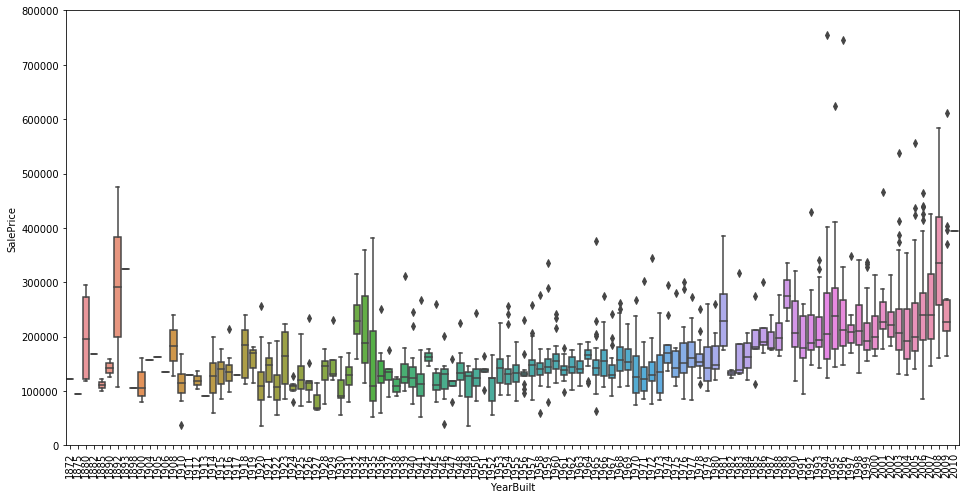

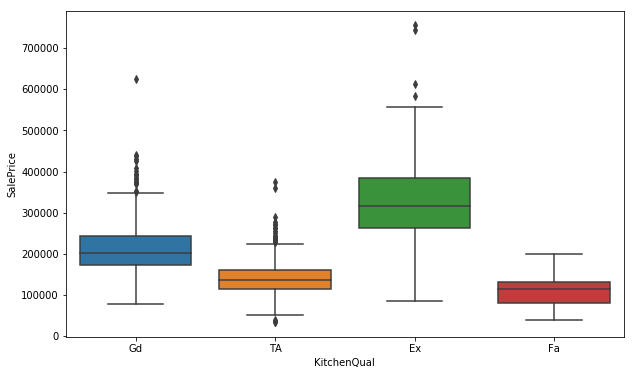

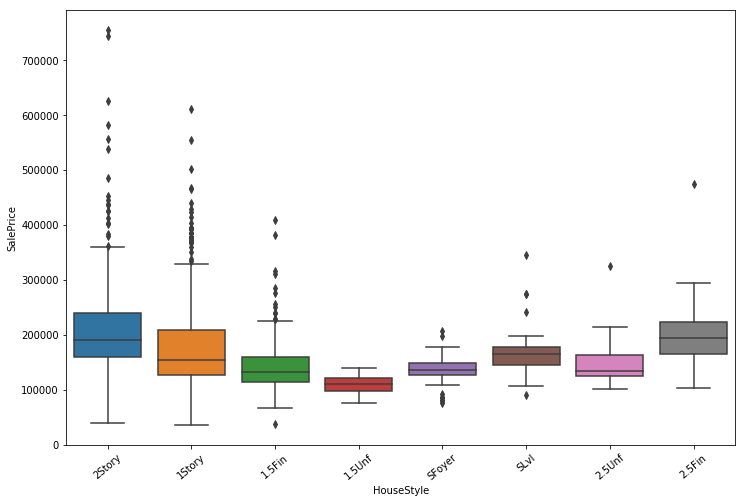

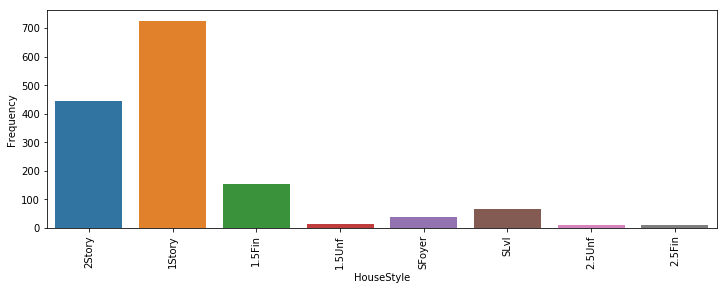

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1422 non-null int64
MSZoning         1422 non-null object
LotFrontage      1422 non-null float64
LotArea          1422 non-null int64
Street           1422 non-null object
Alley            1422 non-null object
LotShape         1422 non-null object
LandContour      1422 non-null object
LotConfig        1422 non-null object
LandSlope        1422 non-null object
Neighborhood     1422 non-null object
Condition1       1422 non-null object
Condition2       1422 non-null object
BldgType         1422 non-null object
HouseStyle       1422 non-null object
OverallQual      1422 non-null int64
OverallCond      1422 non-null int64
YearBuilt        1422 non-null int64
YearRemodAdd     1422 non-null int64
RoofStyle        1422 non-null object
RoofMatl         1422 non-null object
Exterior1st      1422 non-null object
Exterior2nd      1422 non-null object
MasVnrType       1422 no

ValueError: could not convert string to float: 'Normal'

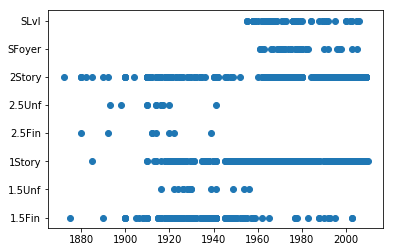

In [359]:
##################################################################
##################################################################
### 1. Exporatory Data Analysis
##################################################################
##################################################################
# Core Modules
import pandas as pd
import numpy as np

# Basic modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Load data into a pandas DataFrame from given filepath
housing = pd.read_csv('./data/train.csv')

##################################
# understand the data structure

# Get column names of the df
housing.columns

# Get the Shape of data
housing.shape
# Get the top 5 rows
housing.head()

housing = housing.drop("Id", axis=1)
housing.info()

# List of numerical attributes
housing.select_dtypes(exclude=['object']).columns

# Get the data summary with upto 2 decimals and call transpose() for a better view of the results
housing.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

# Get the categorical attributes
housing.select_dtypes(include=['object']).columns

#Get the sumamry of categorical attributes
housing.select_dtypes(include=['object']).describe().transpose()




######################################
##   Explore Numerical Attributes
######################################

# Descriptive statistics summary
housing['SalePrice'].describe()


# Get the distribution plot
sns.distplot(housing['SalePrice']);

# Take the log to make the distribution more normal
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

## What about the distribution of all the other numerical variables?
num_attributes = housing.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()

# Print num of variables to make sure we didn't mess up in the last step
print(len(num_attributes.columns))

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()


######################################
##   Looking for Outliers
######################################
fig = plt.figure(figsize=(10, 15))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()


######################################
##   Jusf for fun plot
######################################

housing.plot(kind="scatter", x="OverallQual", y="YearBuilt",  s=housing["GrLivArea"], label="GrLivArea", 
             alpha=0.3, figsize=(10,7), c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()


##############################################
##   Correlations Among Numerical Attributes
##############################################
 
corr = housing.corr()

# Using mask to get triangular correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)


corr['SalePrice'].sort_values(ascending=False)


##############################################
##   Pair-wise scatter matrix
##############################################


col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(housing[col])

sns.barplot(housing.OverallQual, housing.SalePrice)

# Boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=housing.OverallQual, y=housing.SalePrice)

var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


##########################################
## correlation

# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs   


##########################################
###  Explore Categorical Attributes
##########################################
cat_columns = housing.select_dtypes(include='object').columns
print(cat_columns)

var = housing['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing.SalePrice, x=var)
plt.show()


f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=housing.SalePrice, x=housing.HouseStyle)
plt.xticks(rotation=40)
plt.show()

# Count of categories within HouseStyle attribute
fig = plt.figure(figsize=(12, 4))
sns.countplot(x='HouseStyle', data=housing)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

housing["HouseStyle"].value_counts()

plt.scatter(housing['YearBuilt'],housing['HouseStyle'])






##############################################################################
##############################################################################
### Data Preprocessing - prepare the data for machine learning algorithms
##############################################################################
##############################################################################
housing.isnull().sum().sort_values(ascending=False)


# Imputing Missing Values

housing_processed = housing

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

# Replace missing values for categorical columns with None
for cat in cat_cols_fill_none:
    housing_processed[cat] = housing_processed[cat].fillna("None")
    
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
housing_processed['LotFrontage'] = housing_processed.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))    

# Garage: GarageYrBlt, GarageArea and GarageCars these are numerical columns, replace with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    housing_processed[col] = housing_processed[col].fillna(int(0))
    
# MasVnrArea : replace with zero
housing_processed['MasVnrArea'] = housing_processed['MasVnrArea'].fillna(int(0))

# Use the mode value 
housing_processed['Electrical'] = housing_processed['Electrical'].fillna(housing_processed['Electrical']).mode()[0]

# There is no need of Utilities so let's just drop this column
housing_processed = housing_processed.drop(['Utilities'], axis=1)

# Get the count again to verify that we do not have any more missing values
housing_processed.isnull().apply(sum).max()


##########################################
###  Deal With Outliers
##########################################

num_attributes = housing_processed.select_dtypes(exclude='object')

high_quant = housing_processed.quantile(.999)

for i in num_attributes.columns:
    housing_processed = housing_processed.drop(housing_processed[i][housing_processed[i]>high_quant[i]].index)

housing_processed.info()


##########################################
###  Deal With Correlated Attributes
##########################################

#### Remove highly correlated features
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch']

housing_processed = housing_processed.drop(attributes_drop, axis=1)



##########################################
###  Handle Text And Categorical Attributes 
#############################################
# Transforming Cat variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(housing_processed)
housing_processed_1hot


In [360]:
housing_processed.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence

In [371]:
cat_encoder.fit_transform(housing_processed.loc[:,'Street':'Alley'])

ValueError: could not convert string to float: 'None'

In [372]:
housing_processed.loc[:,'Street':'Alley']

,Street,Alley
0,Pave,None
1,Pave,None
2,Pave,None
3,Pave,None
4,Pave,None
5,Pave,None
6,Pave,None
7,Pave,None
8,Pave,None
9,Pave,None
